# Sensitivity analysis for Bayesian networks using credal networks

| | | |
|-|-|-|
|[ ![Creative Commons License](images/cc4.png)](http://creativecommons.org/licenses/by-nc/4.0/) |[ ![aGrUM](images/logoAgrum.png)](https://agrum.org) |[ ![interactive online version](images/atbinder.svg)](https://agrum.gitlab.io/extra/agrum_at_binder.html)

There are several sensitivity analysis frameworks for Bayesian networks. A fairly efficient method is certainly to use credal networks to do this analysis.

## Creating a Bayesian network

In [1]:
import pyAgrum as gum
import pyAgrum.lib.notebook as gnb

In [2]:
bn=gum.fastBN("A->B->C<-D->E->F<-B")
gnb.flow.row(bn,gnb.getInference(bn))

## Building a credal network from a BN

It is easy to build a credal network from a Bayesian network by indicating the 'noise' on each parameter.

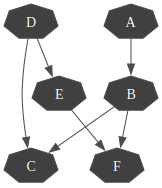

In [3]:
cr=gum.CredalNet(bn,bn)
gnb.show(cr)

In [4]:
cr.bnToCredal(1e-10,False,False)

In [5]:
cr.computeBinaryCPTMinMax()

In [6]:
print(cr)


A:Range([0,1])
<> : [[0.525789 , 0.474211] , [0.52573 , 0.47427]]

B:Range([0,1])
<A:0> : [[0.642877 , 0.357123] , [0.642866 , 0.357134]]
<A:1> : [[0.638671 , 0.361329] , [0.63866 , 0.36134]]

C:Range([0,1])
<B:0|D:0> : [[0.182313 , 0.817687] , [0.135153 , 0.864847]]
<B:1|D:0> : [[0.47401 , 0.52599] , [0.473878 , 0.526122]]
<B:0|D:1> : [[0.218318 , 0.781682] , [0.205459 , 0.794541]]
<B:1|D:1> : [[0.462378 , 0.537622] , [0.46222 , 0.53778]]

D:Range([0,1])
<> : [[0.566658 , 0.433342] , [0.566625 , 0.433375]]

E:Range([0,1])
<D:0> : [[0.839828 , 0.160171]]
<D:1> : [[0.929689 , 0.0703104]]

F:Range([0,1])
<E:0|B:0> : [[0.559784 , 0.440216] , [0.559749 , 0.440251]]
<E:1|B:0> : [[0.918091 , 0.081909]]
<E:0|B:1> : [[0.773178 , 0.226822] , [0.773176 , 0.226824]]
<E:1|B:1> : [[0.432495 , 0.567505] , [0.43224 , 0.56776]]




## Testing difference hypothesis about the global precision on the parameters

We can therefore easily conduct a sensitivity analysis based on an assumption of error on all the parameters of the network.

In [7]:
def showNoisy(bn,beta):
  cr=gum.CredalNet(bn,bn)
  cr.bnToCredal(beta,False,False)
  cr.computeBinaryCPTMinMax()
  ielbp=gum.CNLoopyPropagation(cr)  
  return gnb.getInference(cr,engine=ielbp)

In [8]:
for eps in [1,1e-1,1e-2,1e-3,1e-10]:
  gnb.flow.add(showNoisy(bn,eps),caption=f"noise={eps}")
gnb.flow.display()